In [1]:
import os
import seaborn as sns
import scanpy as sc
import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
sc.settings.set_figure_params(dpi=100, frameon=False)
model = 'tranvae'

dir_path = os.path.expanduser(f'~/Documents/master_thesis/master_thesis_figures/tranvae_pipeline/panc_ood/')
save_path = f'{dir_path}revision_2/'
if not os.path.exists(save_path):
    os.makedirs(save_path)

In [3]:
full = sc.read(f'{dir_path}full_data.h5ad')
full.obs.batch = full.obs.batch.replace('Pancreas SS2', 'Pancreas SS2 (query)')
full.obs.batch = full.obs.batch.replace('Pancreas CelSeq2', 'Pancreas CelSeq2 (query)')
full.obs.celltype = full.obs.celltype.replace('Pancreas Alpha', 'Pancreas Alpha NEW')
full

AnnData object with n_obs × n_vars = 12987 × 10
    obs: 'celltype', 'celltype_orig', 'batch', 'leiden'
    uns: 'leiden', 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

In [11]:
cells = full.obs.celltype_orig.unique().tolist()
cells = cells[0:8]
cells

['Pancreas Endothelial',
 'Pancreas Acinar',
 'Pancreas Beta',
 'Pancreas Delta',
 'Pancreas Stellate',
 'Pancreas Ductal',
 'Pancreas Gamma',
 'Pancreas Alpha']

In [14]:
batches = full.obs.batch.unique().tolist()
batches = batches[0:5]
batches

['Pancreas inDrop',
 'Pancreas CelSeq',
 'Pancreas Fluidigm C1',
 'Pancreas CelSeq2 (query)',
 'Pancreas SS2 (query)']

In [15]:
b_c = sc.pl.palettes.godsnot_102[10:15]
batch_color = [b_c[2], b_c[3], b_c[0],b_c[4], b_c[1]]
ct_c = sc.pl.palettes.godsnot_102
ct_color = [ct_c[0], ct_c[2],ct_c[3],ct_c[4],ct_c[5],ct_c[6],ct_c[7],ct_c[1]]

In [16]:
f1_b = [batch_color[0],batch_color[1],batch_color[3],batch_color[2]]
f1_c = [ct_color[0],ct_color[7],ct_color[1],ct_color[2],ct_color[3],ct_color[4],ct_color[5],ct_color[6]]

In [17]:
f2_b = [batch_color[0],batch_color[4],batch_color[1],batch_color[3],batch_color[2]]
f2_c = [ct_color[0],ct_color[7],ct_color[1],ct_color[2],ct_color[3],ct_color[4],ct_color[5],ct_color[6]]

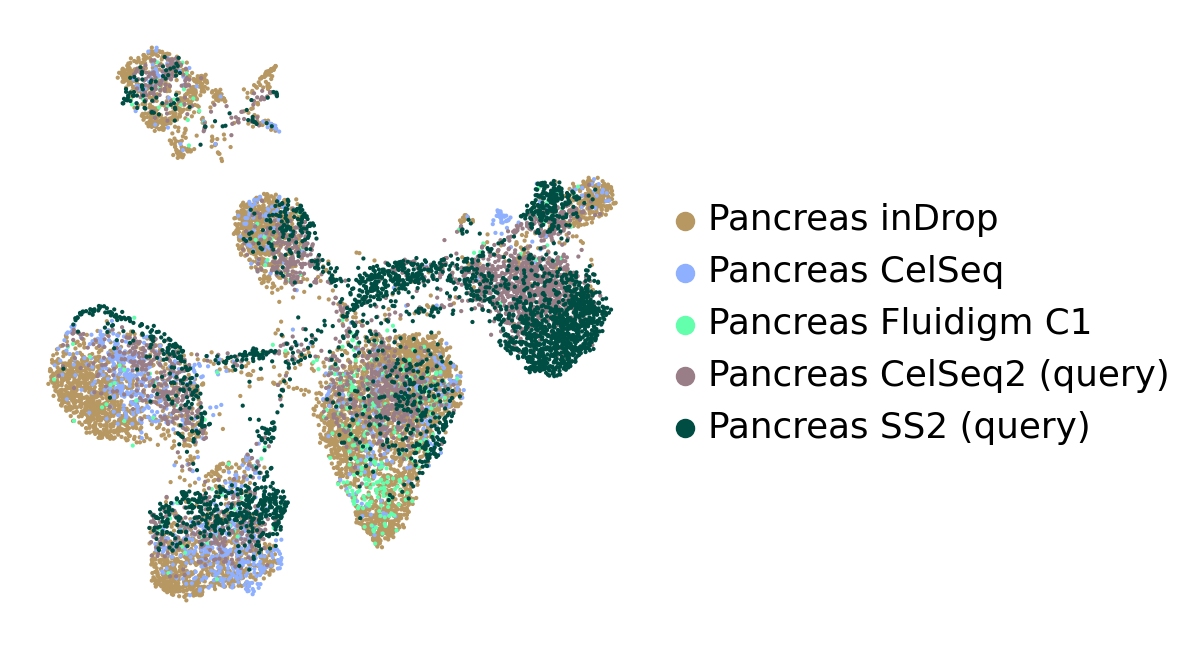

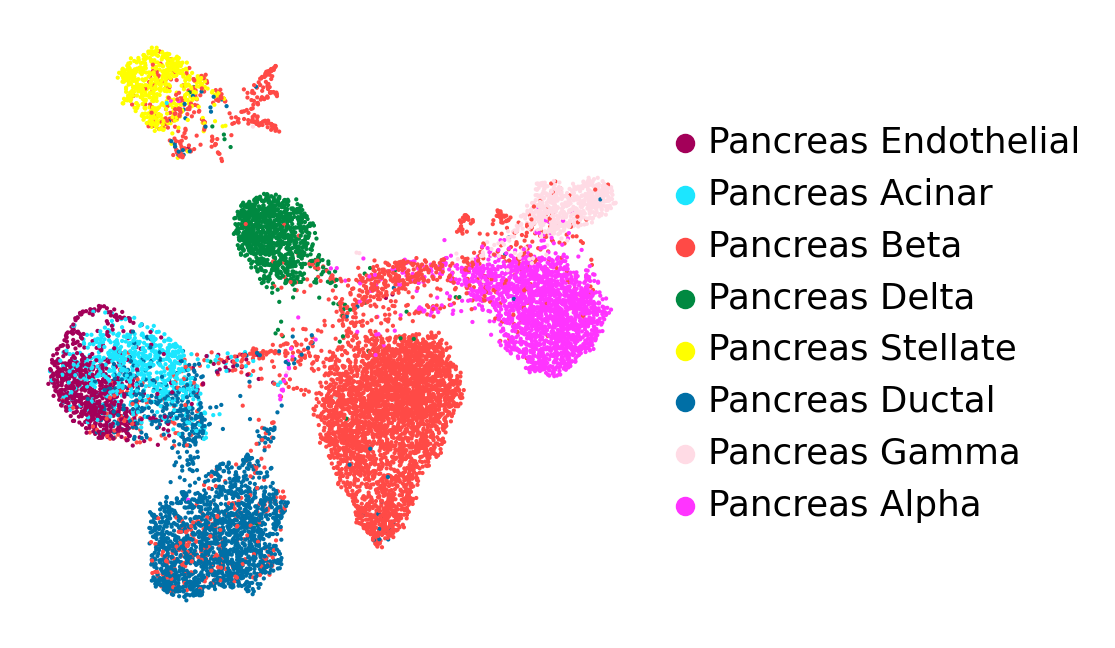

In [18]:
sc.pl.umap(
    full,
    color="batch",
    frameon=False,
    groups=batches,
    ncols=1,
    show=False,
    title='',
    palette=f2_b
)
plt.savefig(f"{save_path}f2_batch.pdf", bbox_inches='tight')
sc.pl.umap(
    full,
    color="celltype_orig",
    groups=cells,
    frameon=False,
    ncols=1,
    show=False,
    title='',
    palette=f2_c
)
plt.savefig(f"{save_path}f2_ct.pdf", bbox_inches='tight')